学习最近邻算法。

In [2]:
library(tidyverse)
library(mlr3verse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mlr3



# kknn

## 基础使用

In [9]:
# 定义任务
tsk_iris <- tsk("iris")

# 定义分类器
lrn_kknn <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("classif.kknn")
)

# 训练
lrn_kknn$train(tsk_iris)

# 预测
pred_kknn <- lrn_kknn$predict(tsk_iris)

# 评估
pred_kknn$score(msr("classif.acc"))

classif.acc 
       0.96

In [ ]:
lrn_kknn$pipeops$classif.kknn$param_set

# <ParamSet(6)>
#             id    class lower upper nlevels default  value
#         <char>   <char> <num> <num>   <num>  <list> <list>
# 1:           k ParamInt     1   Inf     Inf       7      7
# 2:    distance ParamDbl     0   Inf     Inf       2 [NULL]
# 3:      kernel ParamFct    NA    NA      10 optimal [NULL]
# 4:       scale ParamLgl    NA    NA       2    TRUE [NULL]
# 5:     ykernel ParamUty    NA    NA     Inf  [NULL] [NULL]
# 6: store_model ParamLgl    NA    NA       2   FALSE [NULL]

<ParamSet(6)>
            id    class lower upper nlevels default  value
        <char>   <char> <num> <num>   <num>  <list> <list>
1:           k ParamInt     1   Inf     Inf       7      7
2:    distance ParamDbl     0   Inf     Inf       2 [NULL]
3:      kernel ParamFct    NA    NA      10 optimal [NULL]
4:       scale ParamLgl    NA    NA       2    TRUE [NULL]
5:     ykernel ParamUty    NA    NA     Inf  [NULL] [NULL]
6: store_model ParamLgl    NA    NA       2   FALSE [NULL]

## 调参

In [ ]:
as.data.table(mlr_tuning_spaces) %>%
  filter(str_detect(key, "classif.kknn")) %>%
  select(key, label) %>%
  print()

# Key: <key>
#                     key                              label
#                  <char>                             <char>
# 1: classif.kknn.default   Classification KKNN with Default
# 2:    classif.kknn.rbv1 Classification KKNN with RandomBot
# 3:    classif.kknn.rbv2 Classification KKNN with RandomBot

Key: <key>
                    key                              label
                 <char>                             <char>
1: classif.kknn.default   Classification KKNN with Default
2:    classif.kknn.rbv1 Classification KKNN with RandomBot
3:    classif.kknn.rbv2 Classification KKNN with RandomBot


In [ ]:
lts_kknn <- lts("classif.kknn.default")
lts_kknn

# <TuningSpace:classif.kknn.default>: Classification KKNN with Default
#          id lower upper levels logscale
#      <char> <num> <num> <list>   <lgcl>
# 1:        k     1    50 [NULL]     TRUE
# 2: distance     1     5 [NULL]    FALSE
# 3:   kernel    NA    NA [NULL]    FALSE

<TuningSpace:classif.kknn.default>: Classification KKNN with Default
         id lower upper levels logscale
     <char> <num> <num> <list>   <lgcl>
1:        k     1    50 [NULL]     TRUE
2: distance     1     5 [NULL]    FALSE
3:   kernel    NA    NA [NULL]    FALSE

In [18]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义分类器
lrn_kknn <- lrn("classif.kknn")

# 定义调优器
tuner_kknn <- tnr("grid_search", resolution = 5)

# 并行化
future::plan("multisession", workers = 6)

# 调参
instance <- tune(
  task = tsk_german,
  learner = lrn_kknn,
  resampling = rsmp("cv", folds = 3),
  measures = msr("classif.acc"),
  tuner = tuner_kknn,
  search_space = lts_kknn
)

INFO  [14:39:48.879] [bbotk] Starting to optimize 3 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [14:39:48.887] [bbotk] Evaluating 1 configuration(s)
INFO  [14:39:48.891] [mlr3] Running benchmark with 3 resampling iterations
INFO  [14:39:49.342] [mlr3] Applying learner 'classif.kknn' on task 'german_credit' (iter 1/3)
INFO  [14:39:49.719] [mlr3] Applying learner 'classif.kknn' on task 'german_credit' (iter 2/3)
INFO  [14:39:50.148] [mlr3] Applying learner 'classif.kknn' on task 'german_credit' (iter 3/3)
INFO  [14:39:50.572] [mlr3] Finished benchmark
INFO  [14:39:50.593] [bbotk] Result of batch 1:
INFO  [14:39:50.594] [bbotk]         k distance       kernel classif.acc warnings errors runtime_learners
INFO  [14:39:50.594] [bbotk]  1.965913        2 epanechnikov   0.7199954        0      0             0.09
INFO  [14:39:50.594] [bbotk]                                 uhash
INFO  [14:39:50.594] [bbotk]  3c726778-b7a9-41ce-a8d4-5555f71332eb
INFO  [14:39:50.59

In [ ]:
instance$result %>% print()

# k distance  kernel learner_param_vals  x_domain classif.acc
#       <num>    <num>  <char>             <list>    <list>       <num>
# 1: 2.948869        1 optimal          <list[3]> <list[3]>   0.7499685

          k distance  kernel learner_param_vals  x_domain classif.acc
      <num>    <num>  <char>             <list>    <list>       <num>
1: 2.948869        1 optimal          <list[3]> <list[3]>   0.7499685


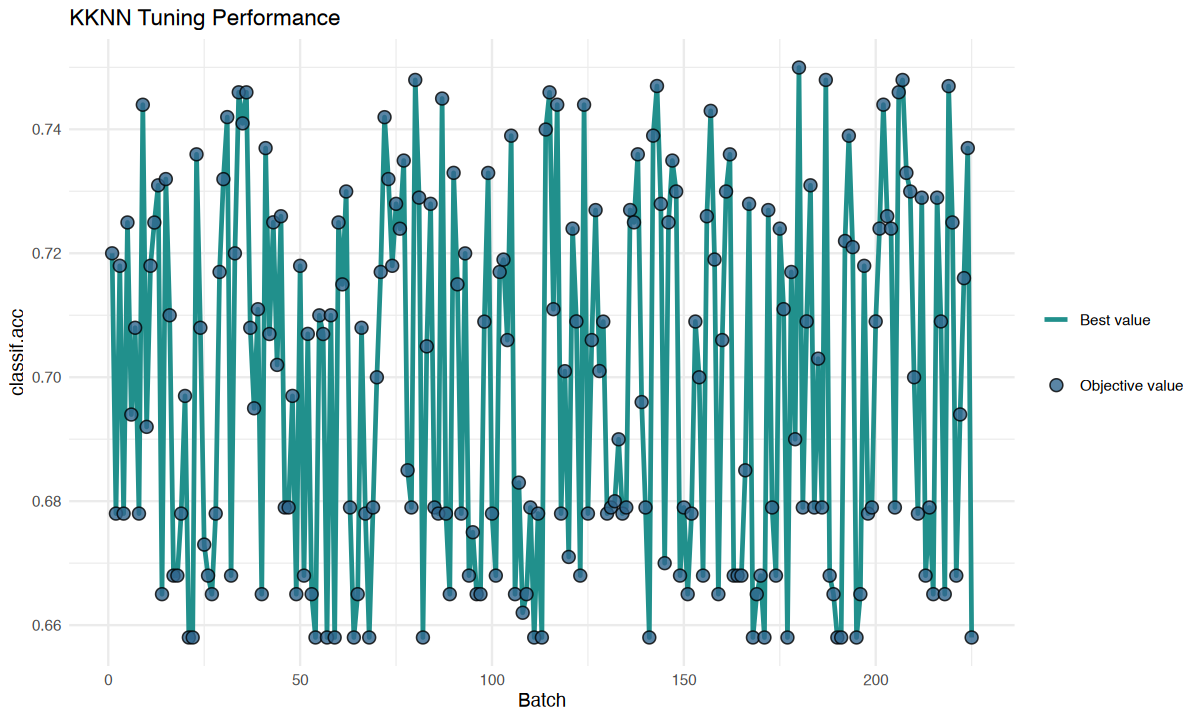

In [24]:
# 调整画布大小
options(repr.plot.width = 10, repr.plot.height = 6)
autoplot(instance, type = "performance") +
  labs(title = "KKNN Tuning Performance")

In [ ]:
# 只测试核函数调参
lrn_kknn <- lrn("classif.kknn")

# 定义搜索空间
lts_kknn <- ps(
  kernel = p_fct(
    c("rectangular", "triangular", "epanechnikov", "biweight",
      "triweight", "cos", "inv", "gaussian", "rank", "optimal")
  )
)

# 定义调优器
tuner_kknn <- tnr("grid_search")

# 调参
instance <- tune(
  task = tsk_german,
  learner = lrn_kknn,
  resampling = rsmp("cv", folds = 3),
  measures = msr("classif.acc"),
  tuner = tuner_kknn,
  search_space = lts_kknn
)
instance$result %>% print()

#         kernel learner_param_vals  x_domain classif.acc
#         <char>             <list>    <list>       <num>
# 1: rectangular          <list[2]> <list[1]>   0.7369555

INFO  [14:46:25.758] [bbotk] Starting to optimize 1 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [14:46:25.763] [bbotk] Evaluating 1 configuration(s)
INFO  [14:46:25.767] [mlr3] Running benchmark with 3 resampling iterations
INFO  [14:46:25.865] [mlr3] Applying learner 'classif.kknn' on task 'german_credit' (iter 1/3)
INFO  [14:46:26.346] [mlr3] Applying learner 'classif.kknn' on task 'german_credit' (iter 2/3)
INFO  [14:46:26.793] [mlr3] Applying learner 'classif.kknn' on task 'german_credit' (iter 3/3)
INFO  [14:46:27.231] [mlr3] Finished benchmark
INFO  [14:46:27.246] [bbotk] Result of batch 1:
INFO  [14:46:27.247] [bbotk]       kernel classif.acc warnings errors runtime_learners
INFO  [14:46:27.247] [bbotk]  rectangular   0.7369555        0      0            0.148
INFO  [14:46:27.247] [bbotk]                                 uhash
INFO  [14:46:27.247] [bbotk]  ec848dab-496c-4286-8c1b-c7956ce56c3d
INFO  [14:46:27.249] [bbotk] Evaluating 1 configuration(

In [35]:
# 定义学习器
lrn_kknn <- lrn("classif.kknn", predict_type = "prob")

# 传入参数
lrn_kknn$param_set$values <- instance$result_learner_param_vals

# 训练
lrn_kknn$train(tsk_german)

# 预测
pred_kknn <- lrn_kknn$predict(tsk_german)

# 评估
pred_kknn$score(msr("classif.acc"))

# classif.acc: 0.808

classif.acc 
      0.808

In [32]:
autoplot(pred_kknn, type = "stack")

ERROR: Error in autoplot.PredictionClassif(pred_kknn, type = "stack"): Assertion on 'type' failed: Must be element of set {'stacked','roc','prc','threshold'}, but is 'stack'.


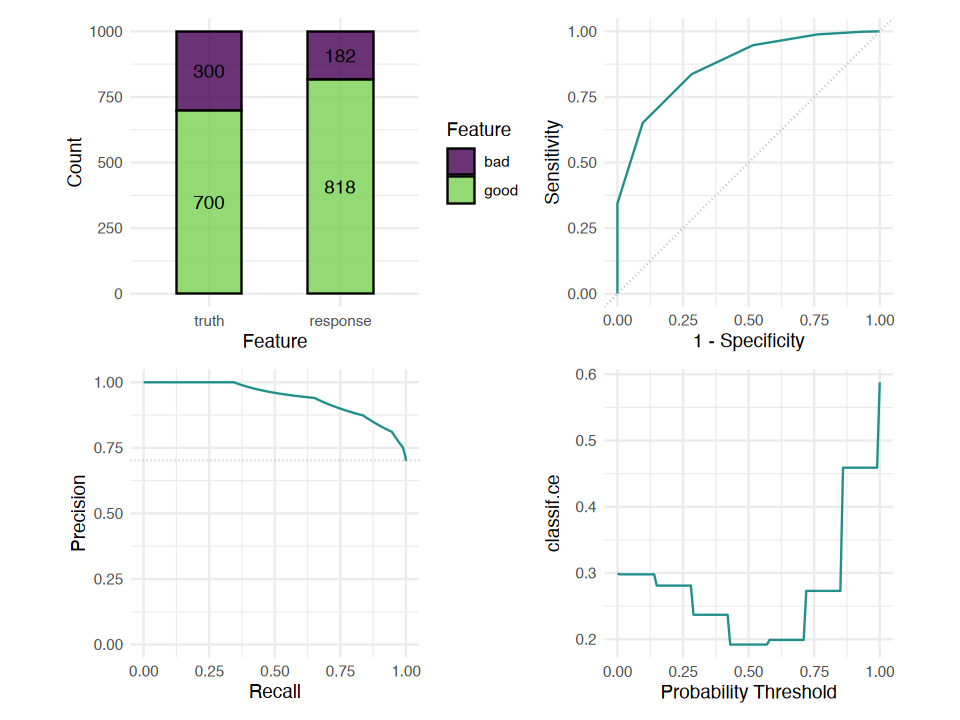

In [37]:
# 修改画布大小
options(repr.plot.width = 8, repr.plot.height = 6)

library(patchwork)

p_stack <- autoplot(pred_kknn, type = "stacked")
p_roc <- autoplot(pred_kknn, type = "roc")
p_prc <- autoplot(pred_kknn, type = "prc")
p_thresh <- autoplot(pred_kknn, type = "threshold")
p_stack + p_roc + p_prc + p_thresh +
  plot_layout(ncol = 2)

In [ ]:
model_kknn <- lrn_kknn$model
summary(model_kknn)

# Length Class      Mode
# formula  3     formula    call
# data    21     data.table list
# pv       2     -none-     list
# kknn     0     -none-     NULL

        Length Class      Mode
formula  3     formula    call
data    21     data.table list
pv       2     -none-     list
kknn     0     -none-     NULL

# classif.fnn

## 基础使用

In [41]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义分类器
lrn_fnn <- lrn("classif.fnn")

# 训练
lrn_fnn$train(tsk_german)

# 预测
pred_fnn <- lrn_fnn$predict(tsk_german)

# 评估
pred_fnn$score(msr("classif.acc"))

ERROR: Error in assert_task_learner(task, learner, param_values): <TaskClassif:german_credit> has the following unsupported feature types: factor, ordered


In [ ]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义分类器
lrn_fnn <- lrn("classif.fnn")

lrn_fnn

# <LearnerClassifFNN:classif.fnn>: Fast Nearest Neighbour
# * Model: -
# * Parameters: list()
# * Packages: mlr3, mlr3extralearners, FNN
# * Predict Types:  [response], prob
# * Feature Types: integer, numeric
# * Properties: multiclass, twoclass

<LearnerClassifFNN:classif.fnn>: Fast Nearest Neighbour
* Model: -
* Parameters: list()
* Packages: mlr3, mlr3extralearners, FNN
* Predict Types:  [response], prob
* Feature Types: integer, numeric
* Properties: multiclass, twoclass

In [45]:
# 定义管道学习器
gr <- ppl("robustify") %>>% lrn("classif.fnn", id = "fnn")
lrn_fnn <- as_learner(gr)
lrn_fnn$id <- "roubust_fnn"

# 训练
lrn_fnn$train(tsk_german)

# 预测
pred_fnn <- lrn_fnn$predict(tsk_german)

# 评估
pred_fnn$score(msr("classif.acc"))

classif.acc 
          1

In [ ]:
lrn_fnn$pipeops$fnn$param_set

# <ParamSet(2)>
#           id    class lower upper nlevels default  value
#       <char>   <char> <num> <num>   <num>  <list> <list>
# 1:         k ParamInt     1   Inf     Inf       1 [NULL]
# 2: algorithm ParamFct    NA    NA       3 kd_tree [NULL]

<ParamSet(2)>
          id    class lower upper nlevels default  value
      <char>   <char> <num> <num>   <num>  <list> <list>
1:         k ParamInt     1   Inf     Inf       1 [NULL]
2: algorithm ParamFct    NA    NA       3 kd_tree [NULL]

## 调参

In [ ]:
# 定义学习器
gr <- ppl("robustify") %>>% lrn("classif.fnn", id = "fnn")
lrn_fnn <- as_learner(gr)
lrn_fnn$id <- "roubust_fnn"

# 定义搜索空间
lts_fnn <- ps(
  fnn.k = p_int(lower = 1, upper = 50, default = 1),
  fnn.algorithm = p_fct(c("kd_tree", "cover_tree", "brute"))
)

# 定义调优器
tuner_fnn <- tnr("grid_search", resolution = 5)

# 调参
instance <- tune(
  task = tsk_german,
  learner = lrn_fnn,
  resampling = rsmp("cv", folds = 3),
  measures = msr("classif.acc"),
  tuner = tuner_fnn,
  search_space = lts_fnn
)

instance$result %>% print()

#    fnn.k fnn.algorithm learner_param_vals  x_domain classif.acc
#    <int>        <char>             <list>    <list>       <num>
# 1:    50       kd_tree         <list[29]> <list[2]>   0.7029784

INFO  [15:12:45.778] [bbotk] Starting to optimize 2 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [15:12:45.783] [bbotk] Evaluating 1 configuration(s)
INFO  [15:12:45.787] [mlr3] Running benchmark with 3 resampling iterations
INFO  [15:12:45.991] [mlr3] Applying learner 'roubust_fnn' on task 'german_credit' (iter 1/3)
INFO  [15:12:46.226] [mlr3] Applying learner 'roubust_fnn' on task 'german_credit' (iter 2/3)
INFO  [15:12:46.596] [mlr3] Applying learner 'roubust_fnn' on task 'german_credit' (iter 3/3)
INFO  [15:12:47.377] [mlr3] Finished benchmark
INFO  [15:12:47.407] [bbotk] Result of batch 1:
INFO  [15:12:47.409] [bbotk]  fnn.k fnn.algorithm classif.acc warnings errors runtime_learners
INFO  [15:12:47.409] [bbotk]     13       kd_tree   0.6819814        0      0            2.871
INFO  [15:12:47.409] [bbotk]                                 uhash
INFO  [15:12:47.409] [bbotk]  1731f03f-99c6-4915-a2c7-183f59ba6f7c
INFO  [15:12:47.411] [bbotk] Evaluating 1 c

# IBk

## 基础使用

In [51]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_ibk <- lrn("classif.IBk")

# 训练
lrn_ibk$train(tsk_german)

# 预测
pred_ibk <- lrn_ibk$predict(tsk_german)

# 评估
pred_ibk$score(msr("classif.acc"))

classif.acc 
          1

## 参数解读

In [ ]:
lrn_ibk$param_set %>%
  as.data.table() %>%
  select(id, class) %>%
  print()

# id    class
#                        <char>   <char>
#  1:                    subset ParamUty
#  2:                 na.action ParamUty
#  3:                    weight ParamFct
#  4:                         K ParamInt
#  5:                         E ParamLgl
#  6:                         W ParamInt
#  7:                         X ParamLgl
#  8:                         A ParamFct
#  9:         output_debug_info ParamLgl
# 10: do_not_check_capabilities ParamLgl
# 11:        num_decimal_places ParamInt
# 12:                batch_size ParamInt
# 13:                   options ParamUty

                           id    class
                       <char>   <char>
 1:                    subset ParamUty
 2:                 na.action ParamUty
 3:                    weight ParamFct
 4:                         K ParamInt
 5:                         E ParamLgl
 6:                         W ParamInt
 7:                         X ParamLgl
 8:                         A ParamFct
 9:         output_debug_info ParamLgl
10: do_not_check_capabilities ParamLgl
11:        num_decimal_places ParamInt
12:                batch_size ParamInt
13:                   options ParamUty
